In [ ]:
                                    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



In [2]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

In [3]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
true_data["label"] = 1
fake_data["label"] = 0

In [6]:

data = pd.concat([true_data, fake_data], axis=0)

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

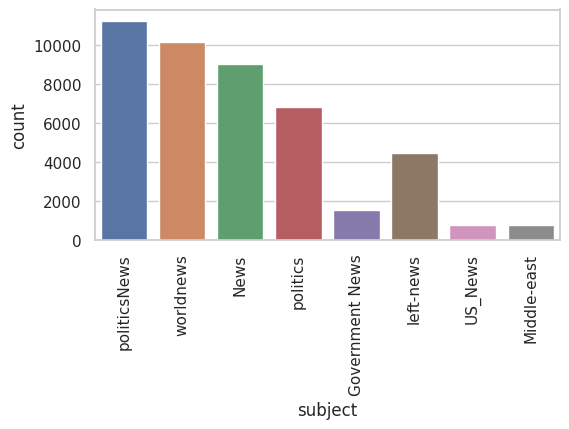

In [9]:

plt.figure(figsize = (6,3))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [18]:

data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

In [19]:

data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [20]:

data.shape

(44898, 2)

In [21]:

data.isnull().sum()

text     0
label    0
dtype: int64

In [22]:

data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,Rights groups urge end to Poland's overhaul of...,1
1,Clinton Gets Trump To Finally Snap: In A Fit ...,0
2,McCain’s Mad World and The Cancer of Conflict ...,0
3,France warns of ballistic proliferation after ...,1
4,MUST-SEE: Protester Hurls Tomatoes At Donald ...,0


<Axes: xlabel='label', ylabel='count'>

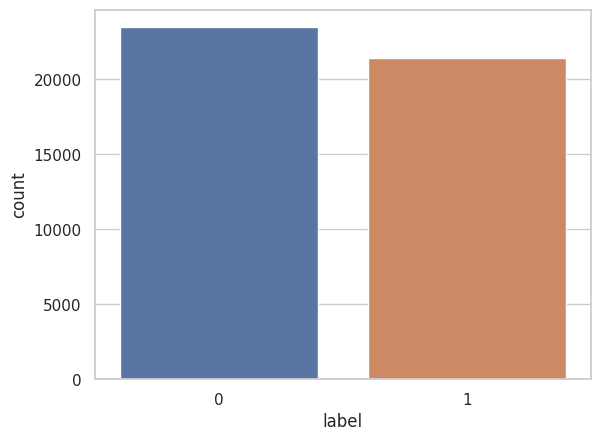

In [23]:

sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

In [24]:

def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove numbers from the text
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces from the text
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    return text

In [25]:

data['text'] = data['text'].apply(preprocess_text)

In [26]:

print(data['text'])

0        rights groups urge end to polands overhaul of ...
1        clinton gets trump to finally snap in a fit of...
2        mccain’s mad world and the cancer of conflict ...
3        france warns of ballistic proliferation after ...
4        mustsee protester hurls tomatoes at donald tru...
                               ...                        
44893    hillary just can’t stop lying…even after she l...
44894    among trump associates concern and frustration...
44895    muslim athlete given “hero’s welcome” indicted...
44896    mexico will only remain in nafta if good for n...
44897    supreme court gives hawaii until tuesday to an...
Name: text, Length: 44898, dtype: object


In [28]:

#separating the data and label
X = data['text'].values
Y = data['label'].values

In [29]:

# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [30]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [31]:

model = LogisticRegression()

In [32]:

model.fit(X_train, Y_train)

LogisticRegression()

In [33]:

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data: {:.2%}'.format(training_data_accuracy))

Accuracy score of the training data: 99.26%


In [34]:

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : {:.2%}'.format(test_data_accuracy))

Accuracy score of the test data : 98.80%


In [35]:

X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is Real')

[1]
The news is Real


In [36]:


#DataFlair - Build confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(X_test_prediction,Y_test, labels=[1,0])

In [37]:
print(matrix)

[[4238   62]
 [  46 4634]]
